In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
db = pd.read_csv("insurance.csv")
data = db.copy()
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
X = data
y = db.charges
X.shape, y.shape

((1338, 7), (1338,))

0


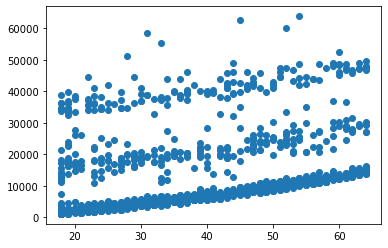

1


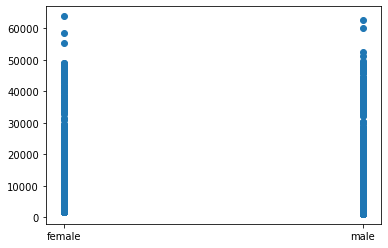

2


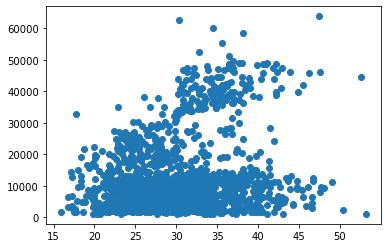

3


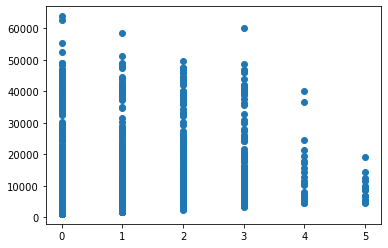

4


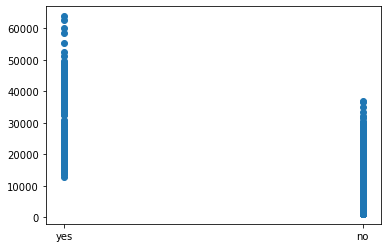

5


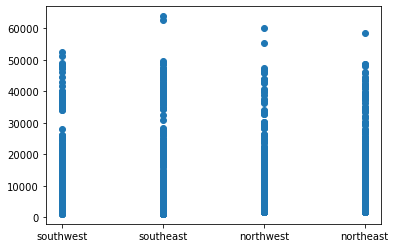

6


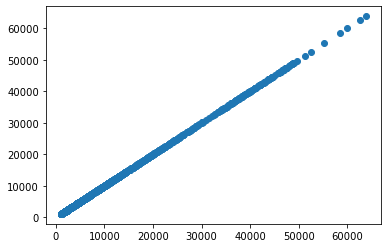

In [4]:
# o Y é o charge, para cada charge, ou seja para cada linha eu ploto o valor do charge e a coluna que estou visitando
# primeiro exemplo é para o valor X de charge qual é a idade correspondente (idade,charge)
for i in range(X.shape[1]):
    print(i)
    plt.scatter(X.iloc[:,i], y)
    plt.show()

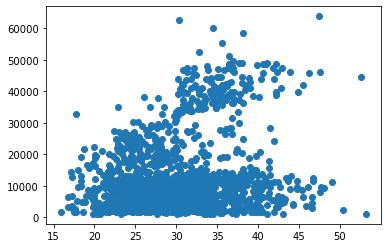

((1338, 1), (1338,))

In [5]:
#peguei (IMC,charge), ou seja vou fazer uma regressao de IMC x valor
X = data.iloc[:,2].values.reshape(-1,1)
#porque precisa ser uma matriz mesmo?

# X4 = X.iloc[:,1:2]
# plt.scatter(X4,y)
# plt.show()

# X = np.array(X, dtype=float)
# y = np.array(y, dtype=float)

plt.scatter(X, y)
plt.show()

X.shape, y.shape



Coefficients: 
 [393.8730308]
Mean squared error: 140777900.10
Coefficient of determination: 0.04
intercept_: 1192.9372089611516


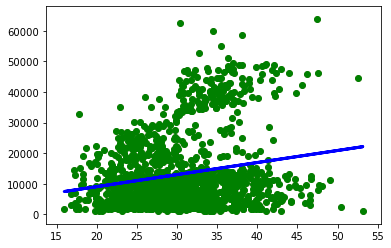

In [6]:

# X_train = X[:-50]
# X_test = X[-50:]

X_train = X_test = X

# Split the targets into training/testing sets
# y_train = y[:-50]
# y_test = y[50:]

y_train = y_test = y

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print("intercept_:",regr.intercept_)

# Plot outputs
plt.scatter(X_train, y_train, color="pink") #train
plt.scatter(X_test, y_test, color="g") #test

plt.plot(X_test, y_pred, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()

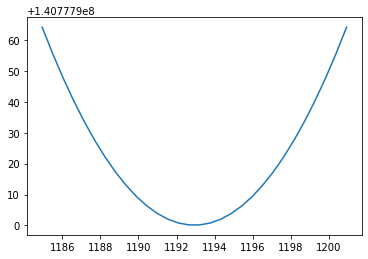

In [7]:
delta = 8
intercept = regr.intercept_

variancia_intercept = np.linspace(intercept-delta, intercept+delta, 30)

# percorrer depois de X-8>x>X+8 (= intercept)
# substituindo o intercept pelo novo e calcular o RMSE apos o predict
# acumulando os rmse num array e depois plota eles

rmseArray = []
for w in variancia_intercept:
	regr.intercept_ = w
	ypred = regr.predict(X)
	mse = mean_squared_error(y, ypred)
	rmseArray.append(mse)

plt.plot(variancia_intercept,rmseArray)
plt.show()
